<a href="https://colab.research.google.com/github/efaber314/RockClimbingDataExploration/blob/master/Climbing_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The original data for this project came from the ifsc-climbing.org website and was posted on kaggle as a data set. (https://www.kaggle.com/brkurzawa/ifsc-sport-climbing-competition-results)

The link to the data-scraper to do so can be found here: (https://github.com/brkurzawa/ifsc-webscraper)

###Rock Climbing has exploded as an international sport in recent years.

Rock climbing has gotten so big that it is making its premiere at the 2020 Olympics. There are 3 categories of Rock climbing. Bouldering, Lead, and Speed. Each one tests a climbers abilities different ways. Bouldering is a short climb with very difficult moves - the 200 meter dash of the climbing world. Lead climbing is more like a marathon. It is a long climb with lots of mental and physical endurance. Speed climbing is the newest category and is a timed climb of a standardized route. Competitors participate in all 3 in a climbing competition and earn scores for each one. Their score is tallied at the end for an overall Ranking.

###In this dataset, there are 3 competitions:
 - The 2019 Youth World Competition. Held in Arco, Italy.
 - The 2019 Pan-American Competition. Held in Ibarra, Ecuador.
 - The 2019 Climbing World competition. Held in Innsbruck, Austria.

From looking at some of the data from these competitions, we can ask things like, which country has the best climbers? Do qualifing scores correlate with final scores? Who is competing the most? What country has the best climbers?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('combined_results.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Competition Title      879 non-null    object 
 1   Competition Date       879 non-null    object 
 2   FIRST                  879 non-null    object 
 3   LAST                   879 non-null    object 
 4   Nation                 879 non-null    object 
 5   Rank                   879 non-null    int64  
 6   Qualification lead     879 non-null    int64  
 7   Qualification speed    879 non-null    float64
 8   Qualification boulder  879 non-null    object 
 9   Final lead             120 non-null    object 
 10  Final speed            120 non-null    object 
 11  Final boulder          120 non-null    object 
 12  Points                 879 non-null    float64
 13  Final Points           120 non-null    float64
 14  Category               879 non-null    object 
dtypes: flo

###The columns have the following descriptions:
- Competition Title - Title of competition
- Competition Date - Dates of competition
- FIRST - First name of climber
- LAST - Last name of climber
- Nation - Nation climber hails from
- StartNr -Corresponds to when the climber went out (Unsure)
- Rank - Final ranking of climber for this competition
- Qualification - Results from set of qualification problems
- Qualification 1 - Results from set of first group qualification problems
- Qualification 2 - Results from set of second group qualification problems
- Semifinal - Results from set of semifinal problems
- Final - Results from set of final problems
- Category -Category of competition


In [39]:
df.head(3)

,Competition Title,Competition Date,FIRST,LAST,Nation,Rank,Qualification lead,Qualification speed,Qualification boulder,Final lead,Final speed,Final boulder,Points,Final Points,Category
0,IFSC Climbing World Championships Combined - H...,18 - 21 August 2019,Janja,GARNBRET,SLO,1,43,9.16570,4T4z552.,Top1.,13.3996.,1T2z122.,112.0,12.0,combined
1,IFSC Climbing World Championships Combined - H...,18 - 21 August 2019,Akiyo,NOGUCHI,JPN,2,38,9.39110,4T4z1284.,40+3.,10.0827.,2T2z331.,80.0,21.0,combined
2,IFSC Climbing World Championships Combined - H...,18 - 21 August 2019,Shauna,COXSEY,GBR,3,39,10.42214,4T4z441.,20 7.,9.2252.,1T2z233.,42.0,42.0,combined


In [0]:
#separate the competitions represented in the folder into their own data frames for comparisons
YouthWorld = pd.DataFrame(columns = df.columns)
PanAmerican = pd.DataFrame(columns = df.columns)
ClimbingWorld = pd.DataFrame(columns = df.columns)

In [0]:
for i in df.index:
  if "IFSC Youth World Championships -  Arco (ITA) 2019" == df.loc[i]["Competition Title"].strip():
    YouthWorld = YouthWorld.append(df.loc[[i]], ignore_index = True)
  if "IFSC PanAmerican Championship (L, S, B, C) - Guayaquil (ECU) 2018" == df.loc[i]["Competition Title"].strip():
    PanAmerican = PanAmerican.append(df.loc[[i]], ignore_index = True)
  if "IFSC Climbing World Championships Combined - Hachioji (JPN) 2019" == df.loc[i]["Competition Title"].strip():
    ClimbingWorld = ClimbingWorld.append(df.loc[[i]], ignore_index = True)

###First, lets look at the Youth World Competition.

Text(0.5, 1.0, 'Number of Competators from Each Country')

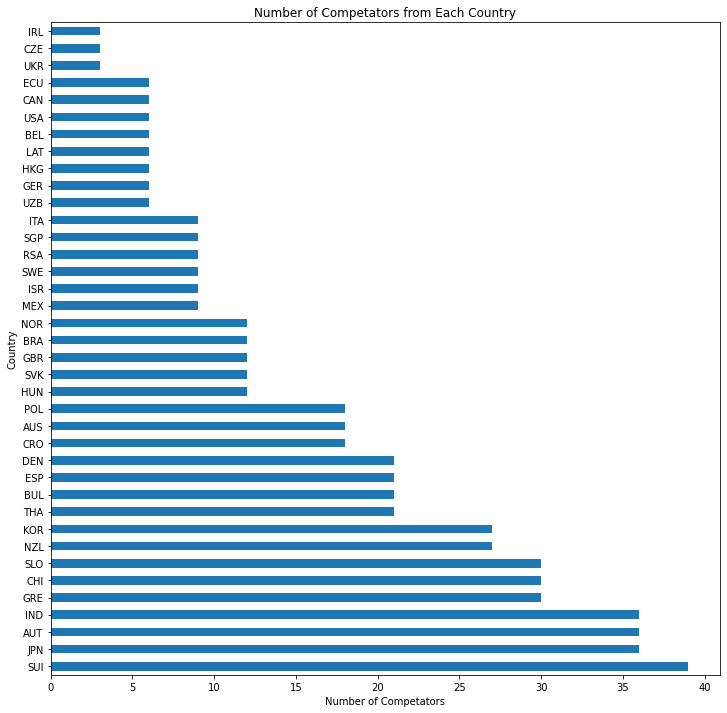

In [6]:
#Plot the number of competators from each country participating in this competition
ax = YouthWorld["Nation"].value_counts().plot(kind = 'barh', figsize = (12,12))
ax.set_xlabel("Number of Competators")
ax.set_ylabel("Country")
ax.set_title("Number of Competators from Each Country")

It is unsurprising to see that traditionally rockier terrained countries have more athletes.

In [37]:
#Who were the winners from this competition and what country do they represent?
WinnersYW = YouthWorld[["FIRST","LAST","Nation","Rank"]].head(3)
WinnersYW

,FIRST,LAST,Nation,Rank
0,Natsumi,HIRANO,JPN,1
1,Julia,LOTZ,AUT,2
2,Emily,PHILLIPS,GBR,3


Even though Switzerland had the most athletes, they did not place. 

In [8]:
#What climber is the best from each country represented at this competition?
TopInGroups1 = YouthWorld.sort_values(['Nation', 'Rank'], ascending = True).groupby('Nation').head(1)
TopInGroups1[['Nation', 'LAST', "FIRST", 'Rank']]

,Nation,LAST,FIRST,Rank
39,AUS,SCARTH-JOHNSON,Angie,5
1,AUT,LOTZ,Julia,2
6,BEL,WATILLON,Lucie,7
122,BRA,BELLOTTO,Mateus,27
36,BUL,TOTKOVA,Aleksandra,2
136,CAN,LE,Dylan,7
76,CHI,CONTRERAS,Alejandra,4
13,CRO,PICCINI,Vana,14
43,CZE,JANOŠOVÁ,Markéta,9
60,DEN,HJORTH ALSTRUP,Anine,26


Here we can see who the best climber is from each country and how well they do overall in the competition

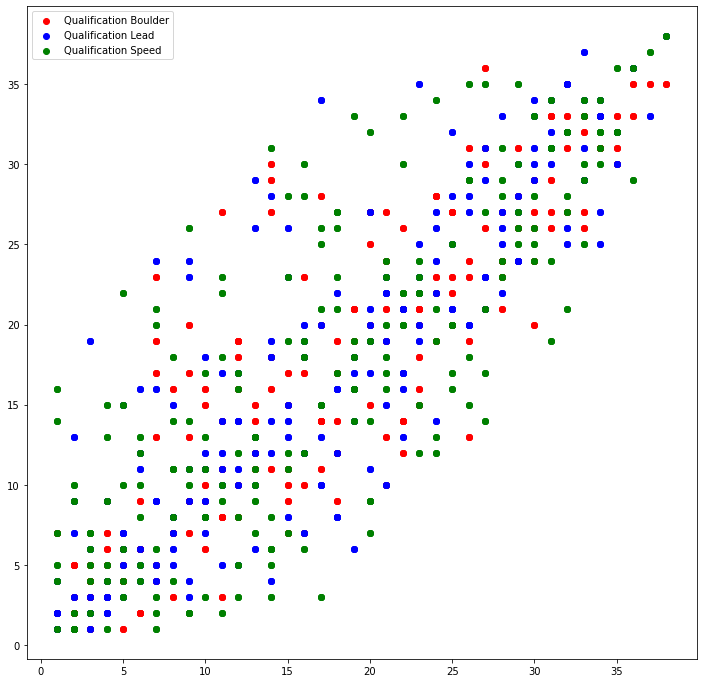

In [31]:
#Some data cleaning - the scores are stored as strings in the csv and I need floats to plot
YouthWorld["Qualification lead"] = [float(i) for i in YouthWorld["Qualification lead"]]
YouthWorld["Qualification speed"] = [float(i) for i in YouthWorld["Qualification speed"]]
YouthWorld["Qualification boulder"] = [float(i) for i in YouthWorld["Qualification boulder"]]

plt.figure(figsize = (12,12))
plt.scatter(YouthWorld["Rank"], YouthWorld["Qualification boulder"], c = 'r', label = "Qualification Boulder")
plt.scatter(YouthWorld["Rank"], YouthWorld["Qualification lead"], c = 'b', label = "Qualification Lead")
plt.scatter(YouthWorld["Rank"], YouthWorld["Qualification speed"], c = 'g', label = "Qualification Speed")

plt.legend()
plt.show()


There is a positive correlation between qualifing scores and final rank scores for this competition in all 3 categories

###Now, we will take a look at the Pan-American Competition

Text(0.5, 1.0, 'Number of Competators from Each Country')

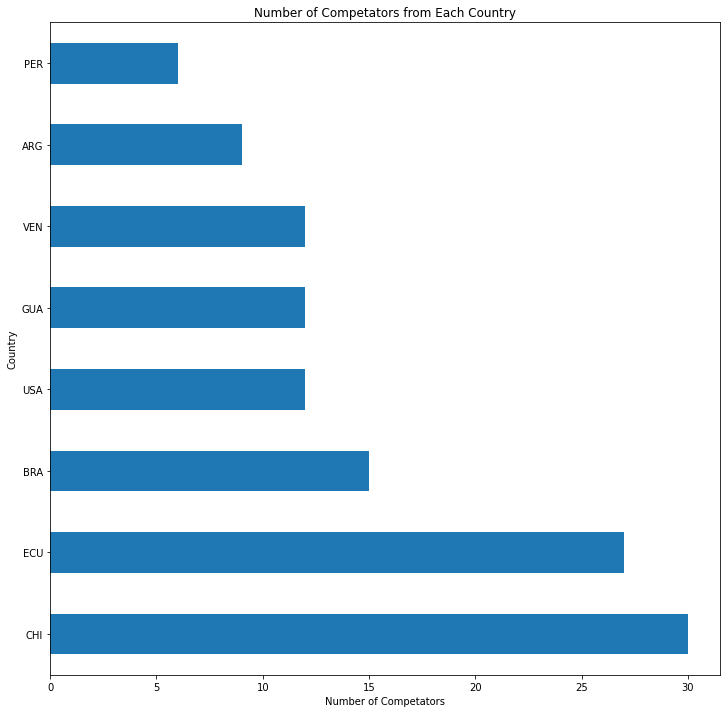

In [107]:
ax1 = PanAmerican['Nation'].value_counts().plot(kind = 'barh', figsize = (12,12))
ax1.set_xlabel("Number of Competators")
ax1.set_ylabel("Country")
ax1.set_title("Number of Competators from Each Country")

In [36]:
#Who are the winners of the competition?
WinnersPA = PanAmerican[["FIRST","LAST","Nation","Rank"]].head(3)
WinnersPA

,FIRST,LAST,Nation,Rank
0,Kyra,CONDIE,USA,1
1,Valentina,AGUADO,ARG,2
2,Andrea,ROJAS,ECU,3


Again, the country with the most athletes does not win the competition.


In [33]:
#Who was the top competitor in each country?
TopInGroups = PanAmerican.sort_values(['Nation', 'Rank'], ascending = True).groupby('Nation').head(1)
TopInGroups[['Nation', 'LAST', "FIRST", 'Rank']]

,Nation,LAST,FIRST,Rank
1,ARG,AGUADO,Valentina,2
17,BRA,GROSSO,Cesar,5
3,CHI,MELLADO QUINTEROS,Ignacia,4
13,ECU,VALENCIA,Danny,1
36,GUA,MORALES,Fernando,24
12,PER,VENET GALLEGOS,Noelia,13
0,USA,CONDIE,Kyra,1
4,VEN,ROMERO,Leslie,5


This shows the top competitor from each country and how well they did in the overall competition.

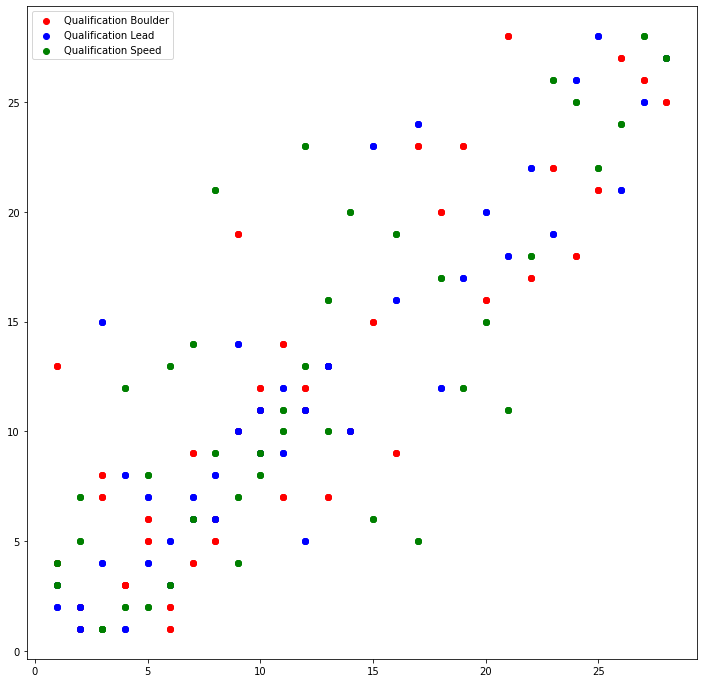

In [34]:
PanAmerican["Qualification lead"] = [float(i) for i in PanAmerican["Qualification lead"]]
PanAmerican["Qualification speed"] = [float(i) for i in PanAmerican["Qualification speed"]]
PanAmerican["Qualification boulder"] = [float(i) for i in PanAmerican["Qualification boulder"]]

plt.figure(figsize = (12,12))
plt.scatter(PanAmerican["Rank"], PanAmerican["Qualification boulder"], c = 'r', label = "Qualification Boulder")
plt.scatter(PanAmerican["Rank"], PanAmerican["Qualification lead"], c = 'b', label = "Qualification Lead")
plt.scatter(PanAmerican["Rank"], PanAmerican["Qualification speed"], c = 'g', label = "Qualification Speed")

plt.legend()
plt.show()



Again, there is a positive correlation between the quallifier scores and the final scores of this competition.

###Now, lets take a look at the Climbing World Championships

Text(0.5, 1.0, 'Number of Competators from Each Country')

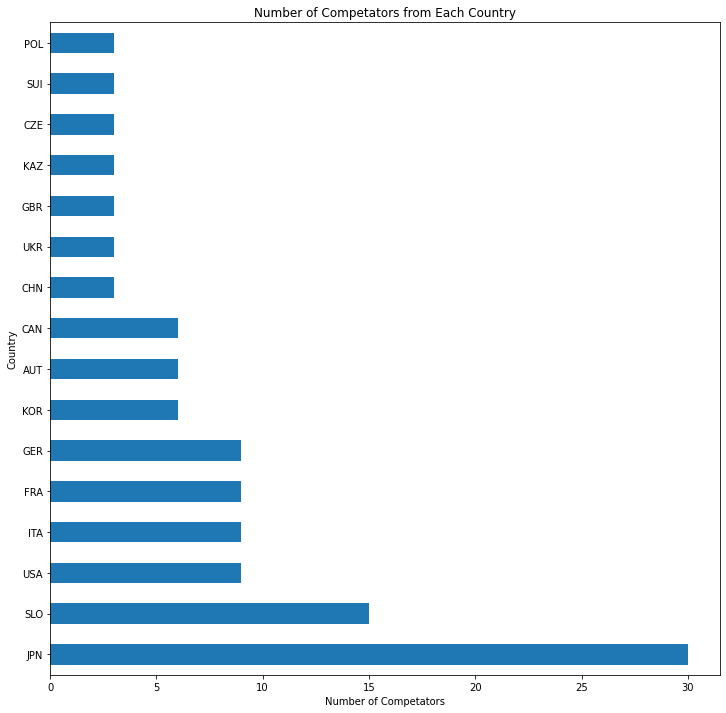

In [108]:
ax2 = ClimbingWorld['Nation'].value_counts().plot(kind = 'barh', figsize = (12,12))
ax2.set_xlabel("Number of Competators")
ax2.set_ylabel("Country")
ax2.set_title("Number of Competators from Each Country")

In [35]:
#Who won the competition?
WinnersCW = ClimbingWorld[["FIRST","LAST","Nation","Rank"]].head(3)
WinnersCW

,FIRST,LAST,Nation,Rank
0,Janja,GARNBRET,SLO,1
1,Akiyo,NOGUCHI,JPN,2
2,Shauna,COXSEY,GBR,3


This time, the two countries with the most athletes did take the top two places. (albiet, out of order)

In [38]:
#Who was the top competitor in from each country?
TopInGroups2 = ClimbingWorld.sort_values(['Nation', 'Rank'], ascending = True).groupby('Nation').head(1)
TopInGroups2[['Nation', 'LAST',"FIRST", 'Rank']]

,Nation,LAST,FIRST,Rank
21,AUT,SCHUBERT,Jakob,2
29,CAN,MCCOLL,Sean,10
14,CHN,NIU,Di,15
37,CZE,ONDRA,Adam,18
26,FRA,MAWEM,Mickael,7
2,GBR,COXSEY,Shauna,3
27,GER,MEGOS,Alexander,8
28,ITA,FOSSALI,Ludovico,9
20,JPN,NARASAKI,Tomoa,1
22,KAZ,KHAIBULLIN,Rishat,3


This shows the top competitors from each country and their final rank in the overall competition.

###Note here, the correlation between the qualifing scores and the final rank in competition are not plotted. The data was not clearly stored for this competition, and so is not cleanable.

In [0]:
#What country competed in all 3 competitions?
IntersectionCountries = pd.merge(TopInGroups['Nation'], TopInGroups1['Nation'], how = "inner")

In [0]:
IntersectionCountries = pd.merge(IntersectionCountries, TopInGroups2['Nation'], how = 'inner')

In [114]:
IntersectionCountries

,Nation
0,USA


###What Questions Can We Answer?

- Overall, the USA appears to send athletes to more competitions.
- Even though they send athletes, that doesn't always mean the USA is winning the competitions.
- There is a general positive correlation with qualification score and final ranking in the competition.